In [120]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [121]:
df1 = df[['Pstatus','G3']]
df1.head()

,Pstatus,G3
0,A,6
1,T,6
2,T,10
3,T,15
4,T,10


In [122]:
df1.isnull().sum()

Pstatus    0
G3         0
dtype: int64

In [123]:
df1.shape

(395, 2)

In [124]:
df2 = df1.dropna()
df2.head()

,Pstatus,G3
0,A,6
1,T,6
2,T,10
3,T,15
4,T,10


In [125]:
df2['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [126]:
df2['Pstatus'].replace({"T":"Married","A":"Divorced"},inplace=True)
df2.head()


,Pstatus,G3
0,Divorced,6
1,Married,6
2,Married,10
3,Married,15
4,Married,10


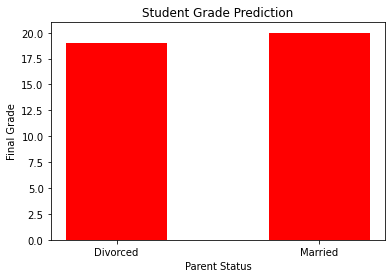

In [141]:
import matplotlib.pyplot as plt

plt.bar(df2['Pstatus'],df2['G3'],color="red",width=0.5)
plt.xlabel('Parent Status')
plt.ylabel('Final Grade')
plt.title("Student Grade Prediction")
plt.show()

In [128]:
from sklearn.model_selection import train_test_split

df3 = df[["G1", "G2", "G3", "studytime", "failures", "absences"]]

predict = "G3"

X = np.array(df3.drop([predict], 1))
y = np.array(df3[predict])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)




C:\Users\orang\AppData\Local\Temp\ipykernel_7352\2342102467.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df3.drop([predict], 1))


In [129]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.7664993388122896

In [130]:
predictions = lr.predict(X_test)
predictions

array([18.63884737, 10.63322223, 15.15522869, 11.9631916 , 12.98570421,
       11.73257043, 11.851254  ,  7.21981894,  7.85395928, 12.40779236,
        8.1443413 , 16.39770048,  6.42267618,  3.60236978,  4.46121118,
        8.52462003, 12.71665614, 18.41488454, 12.77697592, 15.18441058,
        7.54719266, 12.92470567, 14.40842248,  6.0276837 , 10.2038065 ,
       10.53925009,  9.63988155, 16.16183796,  5.64476025, 15.09426828,
        8.91824361, 13.96309346, 11.80944416, 17.05171966,  8.15760988,
       18.14847123, 13.59728287,  7.97472863, 10.69418264, 11.80018918])

In [131]:
for x in range(len(predictions)):
    print(predictions[x], X_test[x], y_test[x])

18.63884737076964 [19 18  2  0  2] 18
10.633222225132169 [10 11  2  0  4] 9
15.155228693690121 [15 15  2  0  2] 16
11.963191598007699 [12 12  2  0  6] 12
12.985704211896143 [14 13  3  1 12] 13
11.732570434266306 [12 12  2  0  0] 11
11.851253997598736 [14 11  1  0 18] 13
7.219818936485892 [8 8 3 0 2] 10
7.8539592820333475 [7 9 4 0 0] 0
12.40779235777415 [10 13  4  0  6] 13
8.144341296236751 [ 9  9  2  2 11] 9
16.397700476400736 [16 16  4  0 12] 16
6.422676177666635 [8 7 1 0 0] 6
3.6023697826088643 [6 5 3 1 0] 0
4.461211176580473 [6 5 1 0 7] 6
8.524620034992457 [10  9  2  0  0] 0
12.71665614090292 [10 13  1  0  4] 14
18.414884539842134 [17 18  1  0  0] 18
12.776975924543294 [14 12  2  0 20] 13
15.18441058353615 [14 15  1  0  3] 16
7.547192661169733 [10  8  2  0  0] 9
12.924705668238998 [13 13  2  0  2] 13
14.408422483608788 [15 14  2  0  8] 14
6.0276837025131975 [7 7 3 0 0] 8
10.203806504832233 [ 8 11  2  0  0] 11
10.539250091009306 [ 9  9  2  0 56] 8
9.639881547718018 [11 10  2  0  0] 1

In [132]:
import pickle
with open("grades.pickle","wb") as f :
    pickle.dump(lr,f)

In [133]:
pickle_in = open("grades.pickle","rb")
lr = pickle.load(pickle_in)

In [134]:
best = 0
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

    lr.fit(X_train, y_train)

    score = lr.score(X_test, y_test)

    if score > best:
        best = score
        with open("grades.pickle","wb") as f :
            pickle.dump(lr,f)




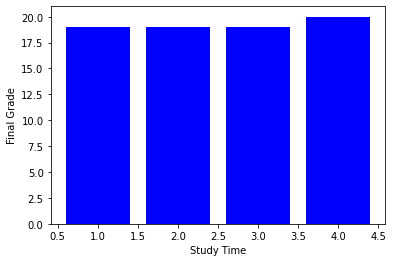

In [135]:
plot = 'studytime'

plt.bar(df[plot], df['G3'],color='blue')
plt.xlabel("Study Time")
plt.ylabel("Final Grade")
plt.show()